In [11]:
import numpy as np
import matplotlib.pyplot as plt

from pymatgen.core import Structure, Lattice, Molecule
from pymatgen.analysis.structure_matcher import StructureMatcher, ElementComparator
from pymatgen.io.cif import CifWriter, CifParser
from pymatgen.io.ase import AseAtomsAdaptor

from ase.io import read, write

In [13]:
import sys
sys.path.append('/global/homes/l/ltshu/Simulation/struc_compare/structurematcher')

import struc_Matcher

In [14]:
# for bilayer, remain layer2,translate layer1
def build_trans_structure(atoms, unitcell, N):
    """
    Args:
    atoms: the bilayer
    unitcell: monolayer, to get the Bravais vectors
    N: translate lattice constant a1, a2 / N

    return: tran_structures
    """
    
    Bra_vector = unitcell.get_cell()
    Bra_vector[2] = [0, 0, 0]
    build_trans_structure = []

    for i in range(N): # da1
        for j in range(N): # da2
            t = (i/N, j/N, 0)
            atoms2 = atoms.copy()
            atoms2.positions[atoms.arrays['atom_types'] < 3] += np.dot(t, Bra_vector)
            build_trans_structure.append(atoms2)
    return build_trans_structure

In [16]:
at = read("/global/homes/l/ltshu/Simulation/struc_compare/structurematcher/MoS2-Bilayer_AA_6x6.xyz")
ce = read("/global/homes/l/ltshu/Simulation/struc_compare/structurematcher/MoS2_monolayer.xyz")

N = 12
tr_strucs = build_trans_structure(at, ce, N)

In [18]:
hist1 = np.zeros(len(tr_strucs))
for i in range(0, len(tr_strucs)):
    hist1[i] = struc_Matcher.structure_matcher(tr_strucs[i], at)[0]

hist2 = np.zeros(len(tr_strucs))
for i in range(0, len(tr_strucs)):
    hist2[i] = struc_Matcher.structure_matcher(tr_strucs[i], at)[1]

matrix1 = np.reshape(hist1, (N, N))
matrix2 = np.reshape(hist2, (N, N))

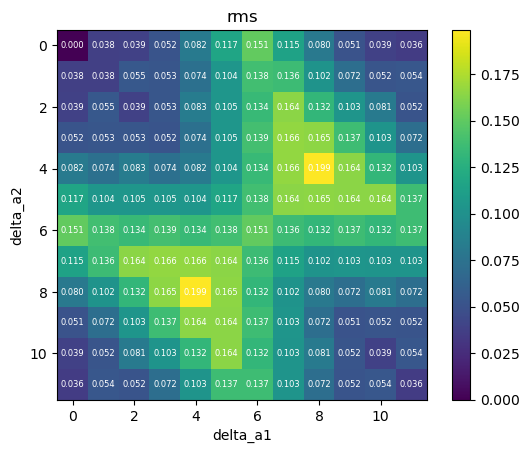

In [34]:
fig, ax = plt.subplots()

cax = ax.imshow(matrix1, cmap='viridis', interpolation='none')

for (i, j), val in np.ndenumerate(matrix1):
    ax.text(j, i, f'{val:.3f}', ha='center', va='center', color='white', fontsize=6)

fig.colorbar(cax)
plt.title('rms')
plt.xlabel('delta_a1')
plt.ylabel('delta_a2')

plt.show()

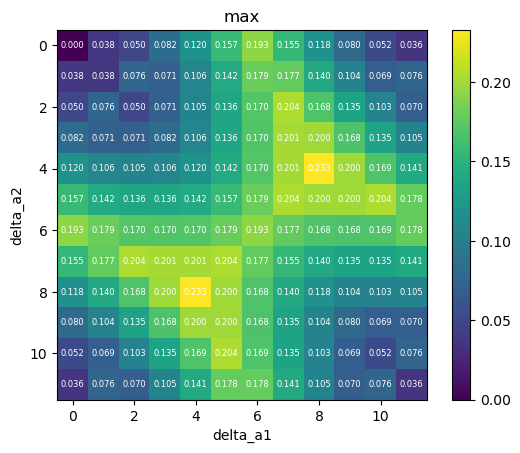

In [35]:
fig, ax = plt.subplots()

cax = ax.imshow(matrix2, cmap='viridis', interpolation='none')

for (i, j), val in np.ndenumerate(matrix2):
    ax.text(j, i, f'{val:.3f}', ha='center', va='center', color='white', fontsize=6)

fig.colorbar(cax)
plt.title('max')
plt.xlabel('delta_a1')
plt.ylabel('delta_a2')

plt.show()